In [1]:
# import the libraries
# These are the libraries which we are going to work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# load the dataset
df=pd.read_excel('Customer_Segmentation_Data.xlsx')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1,Low,4
1,462643,Female,Yes,38,Yes,Engineer,3,Average,3
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2
4,462669,Female,Yes,40,Yes,Entertainment,3,High,6
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0,Low,7
8064,464685,Male,No,35,No,Executive,3,Low,4
8065,465406,Female,No,33,Yes,Healthcare,1,Low,1
8066,467299,Female,No,27,Yes,Healthcare,1,Low,4


## Attribute's information:
* <b>ID:</b> Each individual in the dataset is assigned a unique identifier.

* <b>Gender:</b> Indicates the gender of the individual, with options being Male or Female.

* <b>Ever_Married:</b> Indicates whether the individual has ever been married, with options being Yes or No.

* <b>Age:</b> Represents the age of the individual.

* <b>Graduated:</b> Indicates whether the individual is a graduate, with options being Yes or No.

* <b>Profession:</b> Represents the profession of the individual.

* <b>Work_Experience:</b> Shows the number of years of work experience the individual has.

* <b>Spending_Score:</b> Indicates the spending score of the individual, categorized as Low, Average, or High.

* <b>Family_Size:</b> Represents the size of the individual's family.

In [3]:
# These gives you the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   int64 
 1   Gender           8068 non-null   object
 2   Ever_Married     8068 non-null   object
 3   Age              8068 non-null   int64 
 4   Graduated        8068 non-null   object
 5   Profession       8068 non-null   object
 6   Work_Experience  8068 non-null   int64 
 7   Spending_Score   8068 non-null   object
 8   Family_Size      8068 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 567.4+ KB


In [4]:
# separate the features based on their data types
categorical_features=[]
continuous_features=[]
either_continuous_or_discrete_count=[]
for i in df.columns:
    if df[i].dtypes=='object':
        categorical_features.append(i)
    elif df[i].dtypes=='float64':
        continuous_features.append(i)
    else:
        either_continuous_or_discrete_count.append(i)
print('categorical features:',categorical_features)
print('continuous features:',continuous_features)
print('either continuous or discrete count:',either_continuous_or_discrete_count)

categorical features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
continuous features: []
either continuous or discrete count: ['ID', 'Age', 'Work_Experience', 'Family_Size']


**value counts of each category**

In [5]:
# value counts of Gender feature
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [6]:
# value counts of Ever Married feature
df['Ever_Married'].value_counts()

Yes    4783
No     3285
Name: Ever_Married, dtype: int64

In [7]:
# value counts of Graduated feature
df['Graduated'].value_counts()

Yes    5046
No     3022
Name: Graduated, dtype: int64

In [8]:
# value counts of spending score
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [9]:
# value counts of each categorical features by using loops
for count in categorical_features:
    print('\n',f'---- {count}----','\n')
    print(df[count].value_counts())


 ---- Gender---- 

Male      4417
Female    3651
Name: Gender, dtype: int64

 ---- Ever_Married---- 

Yes    4783
No     3285
Name: Ever_Married, dtype: int64

 ---- Graduated---- 

Yes    5046
No     3022
Name: Graduated, dtype: int64

 ---- Profession---- 

Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

 ---- Spending_Score---- 

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


**Visualising the value counts**

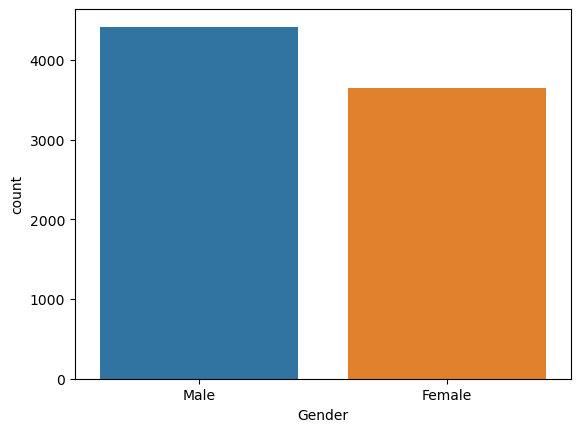

In [10]:
# Gender feature count
sns.countplot(x='Gender',data=df)
plt.show()

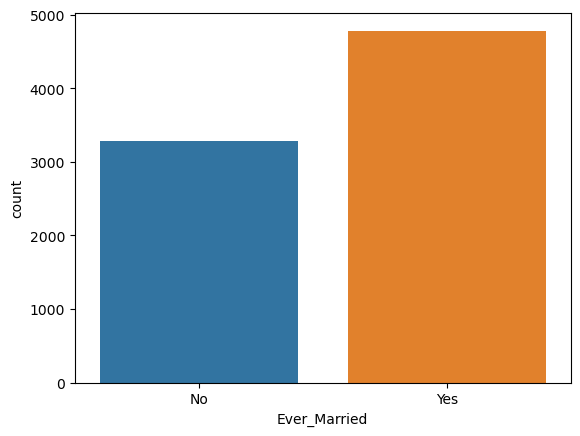

In [11]:
# Ever married feature count
sns.countplot(df['Ever_Married'])
plt.show()

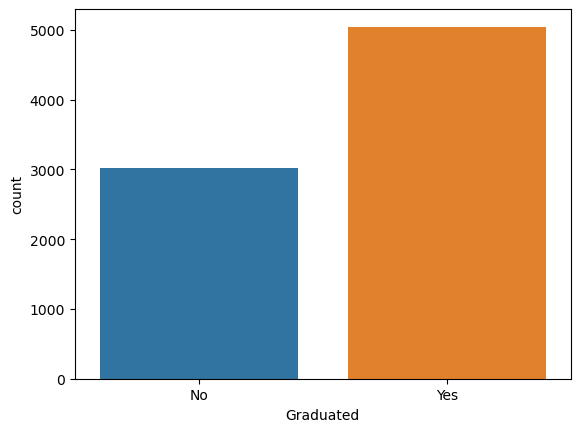

In [12]:
# graduated feature count
sns.countplot(df['Graduated'])
plt.show()

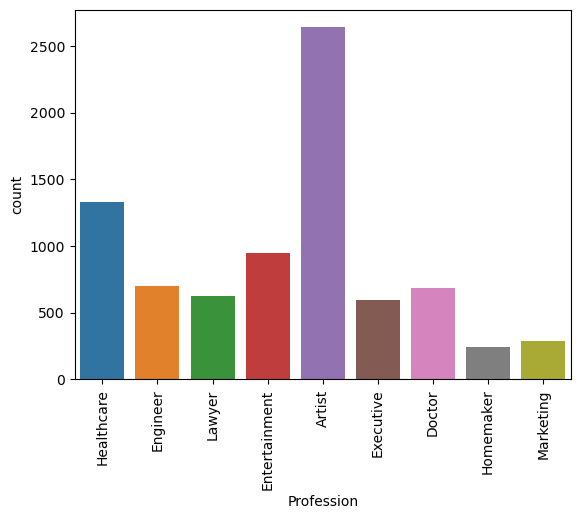

In [13]:
# each profession and their count
sns.countplot(df['Profession'])
plt.xticks(rotation=90)
plt.show()

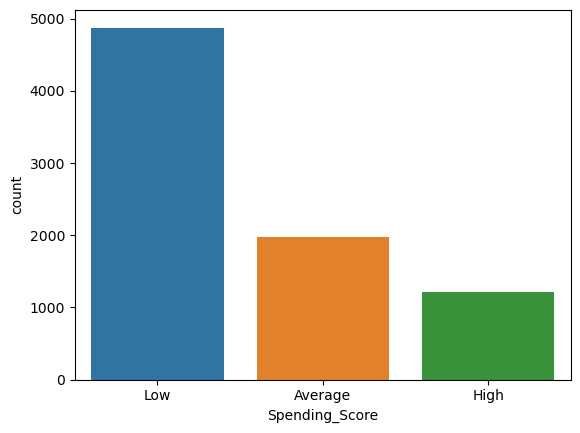

In [14]:
# value counts of spending score
sns.countplot(df['Spending_Score'])
plt.show()

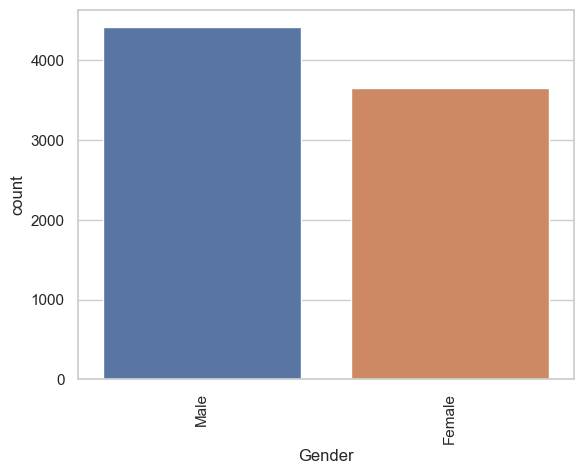

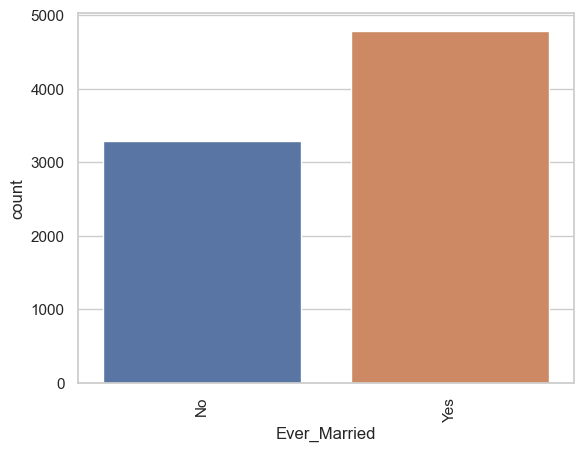

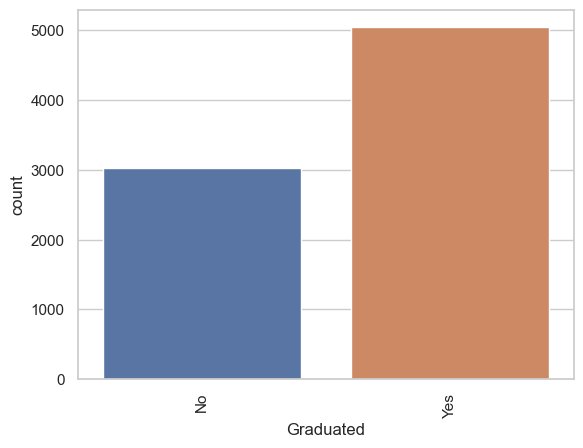

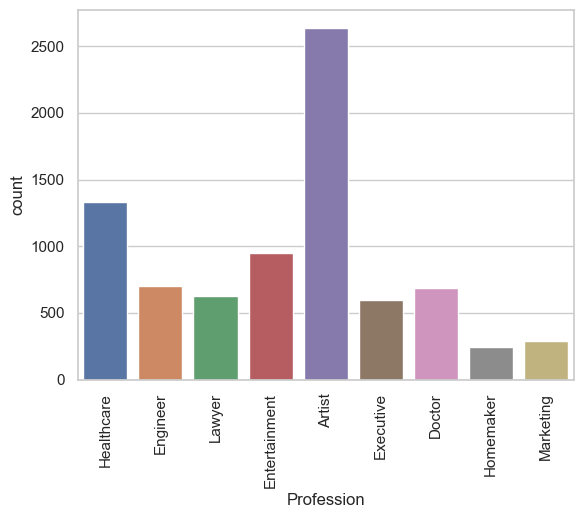

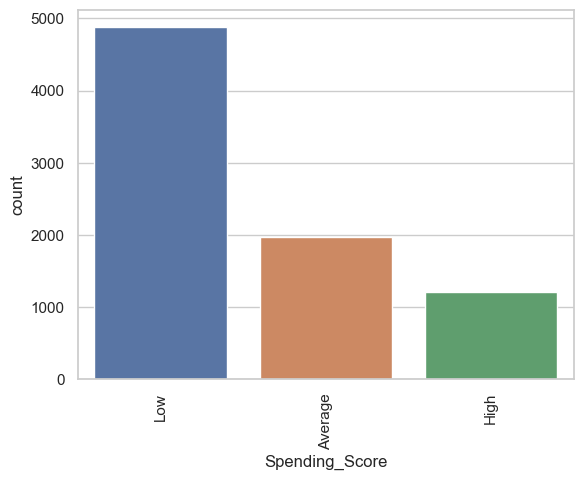

In [15]:
# each categorical features and their count
sns.set_theme(style='whitegrid')
for count in categorical_features:
    sns.countplot(x=df[count])
    plt.xticks(rotation=90)
    plt.show()

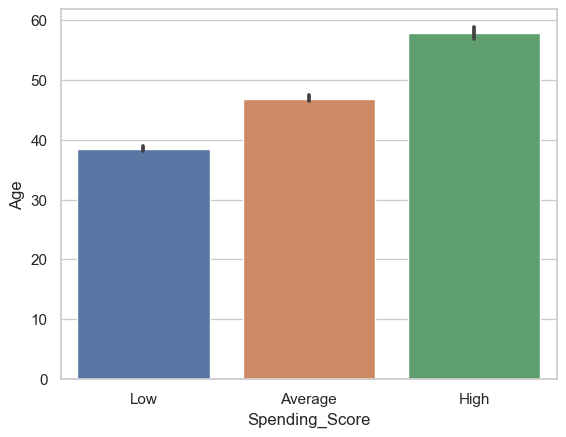

In [16]:
# To chexk the Agewise Spending score
sns.barplot(y='Age',x='Spending_Score',data=df)
plt.show()

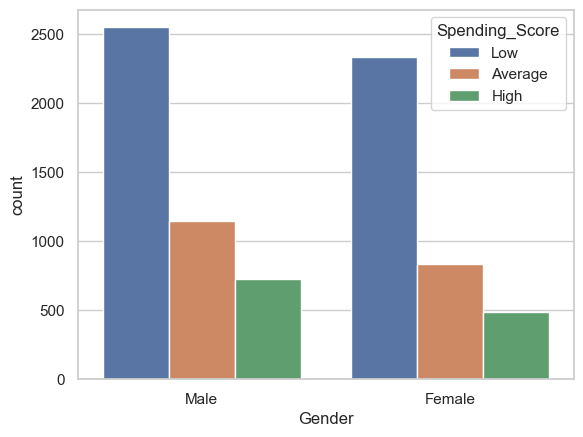

In [17]:
# check the Genderwise spending score
sns.countplot(x='Gender',hue='Spending_Score',data=df)
plt.show()

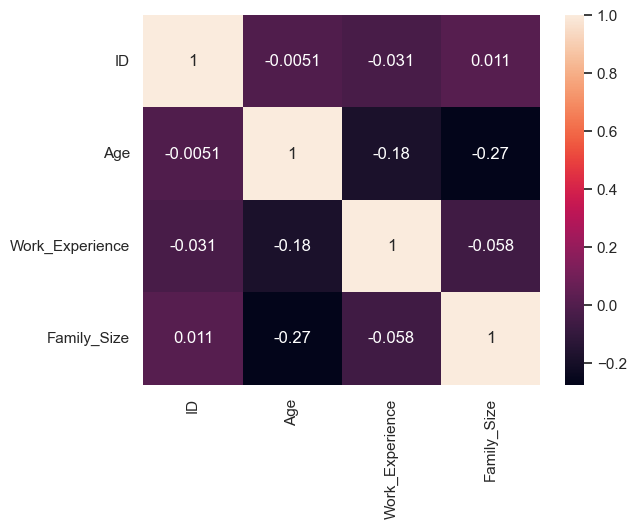

In [18]:
# check the correlation between the features
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
# check the mean, median, min, max and quantiles values
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.678483,2.856346
std,2595.381232,16.711696,3.228806,1.499577
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [20]:
# check the null values
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [21]:
# check the duplicated values
df.duplicated().sum()

0

In [22]:
# drop the unimported features
df.drop(['ID','Gender'],axis=1,inplace=True)

In [23]:
# apply the LabelEncoding for the Ordinal features
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Spending_Score']=lc.fit_transform(df['Spending_Score'])

In [24]:
# brief info about the dataset
df.head()

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,No,22,No,Healthcare,1,2,4
1,Yes,38,Yes,Engineer,3,0,3
2,Yes,67,Yes,Engineer,1,2,1
3,Yes,67,Yes,Lawyer,0,1,2
4,Yes,40,Yes,Entertainment,3,1,6


In [25]:
# apply the Dummies for the Nominal features for ordinal features we are using Label encoder
df=pd.get_dummies(df,drop_first=True)

In [26]:
df.head()

,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,22,1,2,4,0,0,0,0,0,0,1,0,0,0
1,38,3,0,3,1,1,0,1,0,0,0,0,0,0
2,67,1,2,1,1,1,0,1,0,0,0,0,0,0
3,67,0,1,2,1,1,0,0,0,0,0,0,1,0
4,40,3,1,6,1,1,0,0,1,0,0,0,0,0


In [27]:
# apply the Scaling for the Age column
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Age']=sc.fit_transform(df[['Age']])

In [28]:
x=df.iloc[:,:]

In [29]:
x

,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.284623,1,2,4,0,0,0,0,0,0,1,0,0,0
1,-0.327151,3,0,3,1,1,0,1,0,0,0,0,0,0
2,1.408268,1,2,1,1,1,0,1,0,0,0,0,0,0
3,1.408268,0,1,2,1,1,0,0,0,0,0,0,1,0
4,-0.207467,3,1,6,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,0,2,7,0,0,0,0,0,0,0,0,0,0
8064,-0.506677,3,2,4,0,0,0,0,0,1,0,0,0,0
8065,-0.626361,1,2,1,0,1,0,0,0,0,1,0,0,0
8066,-0.985413,1,2,4,0,1,0,0,0,0,1,0,0,0


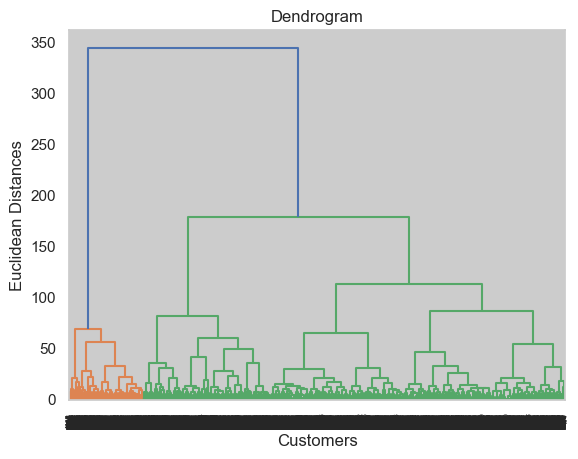

In [30]:
# visualize the Dendrogram
import scipy.cluster.hierarchy as sch
data=sch.linkage(x,method='ward')
dendrogram=sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [31]:
# calculate the wcss values for findout the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[124819.33639067927, 56877.248512944614, 46492.69438045408, 39279.32549411514, 36085.6991071409, 33034.8760064349, 30104.23022001703, 27888.46303802136, 25950.45588180315, 24693.261212727317]


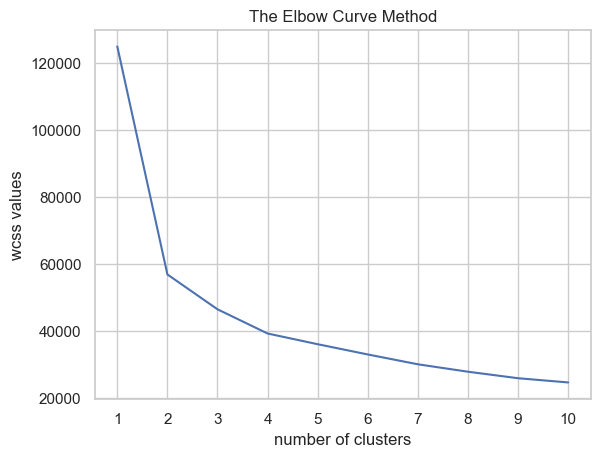

In [32]:
# visualize the Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('The Elbow Curve Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

From the above Elbow Curve we findout the <b>wcss</b> value at 4 

In [33]:
# substitute the wcss value
kmeans=KMeans(n_clusters=4,init='k-means++')

In [34]:
# predict the clusters
y_kmeans=kmeans.fit_predict(x)

In [35]:
# output of the y_kmeans
y_kmeans

array([3, 0, 1, ..., 1, 3, 1])

In [36]:
# convert the predicted clusters into dataframe
df['cluster']=pd.DataFrame(y_kmeans)
df

,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,cluster
0,-1.284623,1,2,4,0,0,0,0,0,0,1,0,0,0,3
1,-0.327151,3,0,3,1,1,0,1,0,0,0,0,0,0,0
2,1.408268,1,2,1,1,1,0,1,0,0,0,0,0,0,1
3,1.408268,0,1,2,1,1,0,0,0,0,0,0,1,0,1
4,-0.207467,3,1,6,1,1,0,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284623,0,2,7,0,0,0,0,0,0,0,0,0,0,3
8064,-0.506677,3,2,4,0,0,0,0,0,1,0,0,0,0,0
8065,-0.626361,1,2,1,0,1,0,0,0,0,1,0,0,0,1
8066,-0.985413,1,2,4,0,1,0,0,0,0,1,0,0,0,3


In [37]:
# check the unique cluster in the dataset
df['cluster'].unique()

array([3, 0, 1, 2])

In [38]:
#predict with new data
kmeans.predict([[-0.40354,3,0,3,1,1,0,1,0,0,0,0,0,0]])

array([0])

**the above info belongs to cluster 0**</br>
For 2 features only we are able to see the cluster's visually for more than two features we are not able to see the cluster's</br>
Heirarchical clustering is mainly used for see the clusters by using <b>Dendrograms</b> and DBSCAN is used for Anamoly detection and K-Means is used for wcss and overall three algorithms gives you the same result